# EDTS Project : Modeling effective connectivity in high-dimensional cortical source signals

**Athors :** Anass El Yaagoubi, Assvin Tharmarajah


- **Original paper :** Yuxiao Wang, Chee-Ming Ting, Hernando Ombao https://ieeexplore.ieee.org/document/7542588
- **Original data  :** Neuropulse Mindset, Colorado State University http://www.cs.colostate.edu/eeg/main/data/2011-12_BCI_at_CSU


In [1]:
from statsmodels.tsa.api import VAR, DynamicVAR
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

import warnings
warnings.filterwarnings('ignore')

## Loading the data in the JSON format

In [2]:
dataMindset = json.load(open('./eeg/s20-mindset-gifford-unimpaired.json','r'))

In [3]:
eegMindset = np.array(dataMindset[0]['eeg']['trial 1'])

In [4]:
X = np.array(dataMindset[0]['eeg']['trial 1'])[:19,:]
X = X.transpose()

channels = dataMindset[0]['channels']

In [5]:
X.shape

(92160, 19)

In [6]:
X_light = X[:20000,:]

In [7]:
print('Light sub dataset : ', X_light.shape)
print('Orinal Data       : ', X.shape)

Light sub dataset :  (20000, 19)
Orinal Data       :  (92160, 19)


## Visualizing a fragment of the data

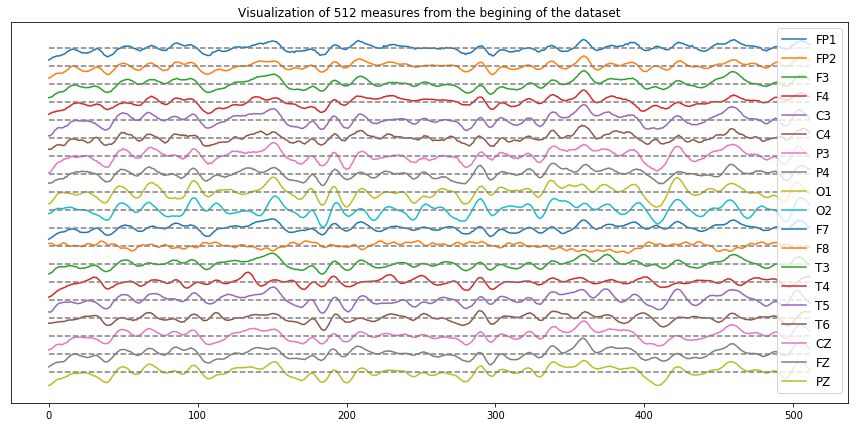

In [8]:
plt.figure(figsize=(15, 7))

plt.title('Visualization of 512 measures from the begining of the dataset')
plt.plot(X[1000:1512,:] + 30*np.arange(18,-1,-1))
plt.plot(np.zeros((512,19)) + 30*np.arange(18,-1,-1),'--',color='gray')

plt.yticks([])

plt.legend(channels, prop={'size':12})
plt.axis('tight')
plt.savefig('./images/eegTimeSeries.png', bbox_inches = 'tight')
plt.show()